In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

from math import sqrt
from numpy import concatenate
from pandas import concat
from numpy import ndarray

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
# fungsi untuk merubah data menjadi supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [3]:
case = pd.read_csv('data/new/case_maret_july.csv')
case.set_index('date', inplace=True)

In [4]:
case.head()

,case
date,
2020-03-18,38
2020-03-19,50
2020-03-20,14
2020-03-21,44
2020-03-22,36


In [5]:
# Ambil data untuk evaluasi
data_evaluasi = case[413:]

#total split data untuk LSTM
n_total = 412

#jumlah neuron
neu = int(2/3*(n_total+1))
jumlah_neuron = neu

# Parameter untuk LSTM
epooch_total = 1000
size_batch = 5

In [6]:
# ubah data menjadi supervised learning problem
reframed = series_to_supervised(case, 1, 1)
reframed

,var1(t-1),var1(t)
date,,
2020-03-19,38.0,50
2020-03-20,50.0,14
2020-03-21,14.0,44
2020-03-22,44.0,36
2020-03-23,36.0,51
...,...,...
2021-05-10,809.0,694
2021-05-11,694.0,406
2021-05-12,406.0,656


In [7]:
# split data menjadi data train dan test
values= reframed.values

train = values[:n_total, :]
test = values[n_total:, :]

# split menjadi input dan output
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input menjadi [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(412, 1, 1) (412,) (10, 1, 1) (10,)


Epoch 1/1000
83/83 - 1s - loss: 991.3424 - val_loss: 711.8325
Epoch 2/1000
83/83 - 0s - loss: 974.5652 - val_loss: 690.9022
Epoch 3/1000
83/83 - 0s - loss: 956.8199 - val_loss: 673.7251
Epoch 4/1000
83/83 - 1s - loss: 940.7948 - val_loss: 657.7217
Epoch 5/1000
83/83 - 0s - loss: 927.2750 - val_loss: 643.8421
Epoch 6/1000
83/83 - 0s - loss: 915.9547 - val_loss: 631.0081
Epoch 7/1000
83/83 - 0s - loss: 906.0624 - val_loss: 618.9894
Epoch 8/1000
83/83 - 0s - loss: 897.2209 - val_loss: 607.5522
Epoch 9/1000
83/83 - 0s - loss: 889.8723 - val_loss: 597.2186
Epoch 10/1000
83/83 - 0s - loss: 885.7300 - val_loss: 591.7808
Epoch 11/1000
83/83 - 0s - loss: 884.4445 - val_loss: 590.2787
Epoch 12/1000
83/83 - 1s - loss: 877.9066 - val_loss: 581.1884
Epoch 13/1000
83/83 - 0s - loss: 877.8550 - val_loss: 580.9007
Epoch 14/1000
83/83 - 0s - loss: 877.6503 - val_loss: 579.0723
Epoch 15/1000
83/83 - 0s - loss: 876.6085 - val_loss: 579.8241
Epoch 16/1000
83/83 - 0s - loss: 879.3647 - val_loss: 583.2120
E

Epoch 131/1000
83/83 - 0s - loss: 832.9010 - val_loss: 521.5488
Epoch 132/1000
83/83 - 0s - loss: 831.4188 - val_loss: 519.9424
Epoch 133/1000
83/83 - 0s - loss: 830.8584 - val_loss: 518.3542
Epoch 134/1000
83/83 - 0s - loss: 830.1567 - val_loss: 516.7816
Epoch 135/1000
83/83 - 0s - loss: 834.9062 - val_loss: 521.9191
Epoch 136/1000
83/83 - 0s - loss: 833.2501 - val_loss: 520.4010
Epoch 137/1000
83/83 - 0s - loss: 837.0654 - val_loss: 525.5844
Epoch 138/1000
83/83 - 0s - loss: 837.4067 - val_loss: 524.2156
Epoch 139/1000
83/83 - 0s - loss: 834.6007 - val_loss: 523.6462
Epoch 140/1000
83/83 - 0s - loss: 840.7637 - val_loss: 529.2805
Epoch 141/1000
83/83 - 0s - loss: 836.4487 - val_loss: 527.7961
Epoch 142/1000
83/83 - 0s - loss: 843.3506 - val_loss: 533.5735
Epoch 143/1000
83/83 - 0s - loss: 839.8851 - val_loss: 532.1717
Epoch 144/1000
83/83 - 0s - loss: 845.5856 - val_loss: 538.0355
Epoch 145/1000
83/83 - 0s - loss: 843.7359 - val_loss: 536.7482
Epoch 146/1000
83/83 - 0s - loss: 842.82

83/83 - 0s - loss: 829.3647 - val_loss: 516.8484
Epoch 260/1000
83/83 - 0s - loss: 828.5413 - val_loss: 516.0260
Epoch 261/1000
83/83 - 0s - loss: 828.4287 - val_loss: 515.2278
Epoch 262/1000
83/83 - 0s - loss: 828.2147 - val_loss: 514.4391
Epoch 263/1000
83/83 - 0s - loss: 827.5975 - val_loss: 513.6293
Epoch 264/1000
83/83 - 0s - loss: 846.2200 - val_loss: 538.9547
Epoch 265/1000
83/83 - 0s - loss: 844.0356 - val_loss: 538.2414
Epoch 266/1000
83/83 - 0s - loss: 842.8581 - val_loss: 537.5266
Epoch 267/1000
83/83 - 0s - loss: 842.4091 - val_loss: 536.8090
Epoch 268/1000
83/83 - 0s - loss: 841.8371 - val_loss: 536.0908
Epoch 269/1000
83/83 - 0s - loss: 841.3757 - val_loss: 535.3713
Epoch 270/1000
83/83 - 0s - loss: 840.9247 - val_loss: 534.6564
Epoch 271/1000
83/83 - 0s - loss: 840.3568 - val_loss: 533.9373
Epoch 272/1000
83/83 - 0s - loss: 839.8291 - val_loss: 533.2196
Epoch 273/1000
83/83 - 0s - loss: 839.2385 - val_loss: 532.4960
Epoch 274/1000
83/83 - 0s - loss: 838.7423 - val_loss: 

Epoch 388/1000
83/83 - 0s - loss: 842.9722 - val_loss: 535.3164
Epoch 389/1000
83/83 - 0s - loss: 840.8082 - val_loss: 534.7399
Epoch 390/1000
83/83 - 0s - loss: 840.6465 - val_loss: 534.1791
Epoch 391/1000
83/83 - 0s - loss: 840.0626 - val_loss: 533.6068
Epoch 392/1000
83/83 - 0s - loss: 839.8794 - val_loss: 533.0395
Epoch 393/1000
83/83 - 0s - loss: 839.6299 - val_loss: 532.4830
Epoch 394/1000
83/83 - 0s - loss: 838.9134 - val_loss: 531.9138
Epoch 395/1000
83/83 - 0s - loss: 838.5547 - val_loss: 531.3440
Epoch 396/1000
83/83 - 0s - loss: 838.2267 - val_loss: 530.7764
Epoch 397/1000
83/83 - 0s - loss: 837.9902 - val_loss: 530.2233
Epoch 398/1000
83/83 - 0s - loss: 837.1389 - val_loss: 529.6467
Epoch 399/1000
83/83 - 0s - loss: 836.9566 - val_loss: 529.0795
Epoch 400/1000
83/83 - 0s - loss: 836.4996 - val_loss: 528.5036
Epoch 401/1000
83/83 - 0s - loss: 836.5693 - val_loss: 527.9511
Epoch 402/1000
83/83 - 0s - loss: 835.6036 - val_loss: 527.3801
Epoch 403/1000
83/83 - 0s - loss: 835.25

83/83 - 0s - loss: 828.3280 - val_loss: 515.9758
Epoch 517/1000
83/83 - 0s - loss: 827.9532 - val_loss: 515.3192
Epoch 518/1000
83/83 - 0s - loss: 827.8563 - val_loss: 514.6689
Epoch 519/1000
83/83 - 0s - loss: 827.3754 - val_loss: 514.0257
Epoch 520/1000
83/83 - 0s - loss: 826.8364 - val_loss: 513.3633
Epoch 521/1000
83/83 - 0s - loss: 826.1030 - val_loss: 512.7080
Epoch 522/1000
83/83 - 0s - loss: 825.4529 - val_loss: 512.0399
Epoch 523/1000
83/83 - 0s - loss: 825.7126 - val_loss: 511.3890
Epoch 524/1000
83/83 - 0s - loss: 825.3152 - val_loss: 510.7373
Epoch 525/1000
83/83 - 0s - loss: 829.8920 - val_loss: 515.1708
Epoch 526/1000
83/83 - 0s - loss: 834.9982 - val_loss: 523.4164
Epoch 527/1000
83/83 - 0s - loss: 833.9084 - val_loss: 522.9100
Epoch 528/1000
83/83 - 0s - loss: 831.6504 - val_loss: 522.2159
Epoch 529/1000
83/83 - 0s - loss: 832.9333 - val_loss: 521.7115
Epoch 530/1000
83/83 - 0s - loss: 830.6004 - val_loss: 520.9994
Epoch 531/1000
83/83 - 0s - loss: 832.0472 - val_loss: 

Epoch 645/1000
83/83 - 0s - loss: 852.1600 - val_loss: 551.8434
Epoch 646/1000
83/83 - 0s - loss: 852.3448 - val_loss: 551.4413
Epoch 647/1000
83/83 - 0s - loss: 851.5513 - val_loss: 551.0023
Epoch 648/1000
83/83 - 0s - loss: 851.8259 - val_loss: 550.6019
Epoch 649/1000
83/83 - 0s - loss: 851.0659 - val_loss: 550.1622
Epoch 650/1000
83/83 - 0s - loss: 851.3439 - val_loss: 549.7723
Epoch 651/1000
83/83 - 0s - loss: 850.1823 - val_loss: 549.3211
Epoch 652/1000
83/83 - 0s - loss: 850.6940 - val_loss: 548.9210
Epoch 653/1000
83/83 - 0s - loss: 849.9266 - val_loss: 548.4823
Epoch 654/1000
83/83 - 0s - loss: 850.2216 - val_loss: 548.0921
Epoch 655/1000
83/83 - 0s - loss: 849.1326 - val_loss: 547.6412
Epoch 656/1000
83/83 - 0s - loss: 849.8469 - val_loss: 547.2590
Epoch 657/1000
83/83 - 0s - loss: 848.6666 - val_loss: 546.8042
Epoch 658/1000
83/83 - 0s - loss: 849.5919 - val_loss: 546.4355
Epoch 659/1000
83/83 - 0s - loss: 847.9743 - val_loss: 545.9709
Epoch 660/1000
83/83 - 0s - loss: 849.05

83/83 - 0s - loss: 815.2876 - val_loss: 498.1714
Epoch 774/1000
83/83 - 0s - loss: 816.6335 - val_loss: 497.7486
Epoch 775/1000
83/83 - 0s - loss: 814.2546 - val_loss: 497.2452
Epoch 776/1000
83/83 - 0s - loss: 815.4356 - val_loss: 496.7962
Epoch 777/1000
83/83 - 0s - loss: 814.1611 - val_loss: 496.3210
Epoch 778/1000
83/83 - 0s - loss: 814.6922 - val_loss: 495.8843
Epoch 779/1000
83/83 - 0s - loss: 813.4471 - val_loss: 495.4045
Epoch 780/1000
83/83 - 0s - loss: 813.2928 - val_loss: 494.9285
Epoch 781/1000
83/83 - 0s - loss: 814.0037 - val_loss: 494.5092
Epoch 782/1000
83/83 - 0s - loss: 811.9106 - val_loss: 494.0064
Epoch 783/1000
83/83 - 0s - loss: 813.1803 - val_loss: 493.5732
Epoch 784/1000
83/83 - 0s - loss: 812.0169 - val_loss: 493.0972
Epoch 785/1000
83/83 - 0s - loss: 812.2724 - val_loss: 492.6622
Epoch 786/1000
83/83 - 0s - loss: 810.9838 - val_loss: 492.1781
Epoch 787/1000
83/83 - 0s - loss: 811.3768 - val_loss: 491.7339
Epoch 788/1000
83/83 - 0s - loss: 810.4597 - val_loss: 

Epoch 902/1000
83/83 - 0s - loss: 804.0408 - val_loss: 482.7689
Epoch 903/1000
83/83 - 0s - loss: 803.7687 - val_loss: 482.3521
Epoch 904/1000
83/83 - 0s - loss: 803.6327 - val_loss: 481.9418
Epoch 905/1000
83/83 - 0s - loss: 802.9297 - val_loss: 481.5174
Epoch 906/1000
83/83 - 0s - loss: 803.3425 - val_loss: 481.1105
Epoch 907/1000
83/83 - 0s - loss: 802.3594 - val_loss: 480.6774
Epoch 908/1000
83/83 - 0s - loss: 802.8057 - val_loss: 480.2725
Epoch 909/1000
83/83 - 0s - loss: 801.8324 - val_loss: 479.8491
Epoch 910/1000
83/83 - 0s - loss: 801.8359 - val_loss: 479.4355
Epoch 911/1000
83/83 - 0s - loss: 801.2720 - val_loss: 479.0143
Epoch 912/1000
83/83 - 0s - loss: 801.2565 - val_loss: 478.6007
Epoch 913/1000
83/83 - 0s - loss: 800.6574 - val_loss: 478.1783
Epoch 914/1000
83/83 - 0s - loss: 800.6636 - val_loss: 477.7648
Epoch 915/1000
83/83 - 0s - loss: 800.1026 - val_loss: 477.3416
Epoch 916/1000
83/83 - 0s - loss: 800.2698 - val_loss: 476.9333
Epoch 917/1000
83/83 - 0s - loss: 799.64

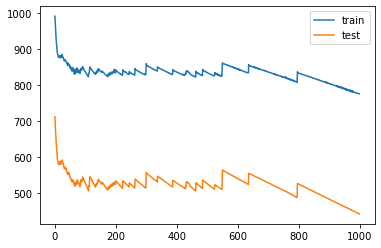

In [8]:
# LSTM model untuk seasonal
model = Sequential()
model.add(LSTM(jumlah_neuron, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=epooch_total, batch_size=size_batch, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [9]:
# make a prediction
yhat = model.predict(test_X)
yhat

array([[282.5008 ],
       [282.60278],
       [282.60278],
       [282.60278],
       [282.60278],
       [282.60278],
       [282.60275],
       [282.4679 ],
       [282.60263],
       [282.60278]], dtype=float32)

In [10]:
# jadikan list semua hasil prediksi
hasil_lstm = ndarray.tolist(yhat)
list_evaluasi = data_evaluasi['case'].tolist()
length = len(list_evaluasi)
hasil_final = list()

for i in range(length):
    result_single = hasil_lstm[i]
    result_single = result_single[0]
    tambah = result_single
    hasil_final.append(tambah)
    #print('hasil tambah',tambah)

hasil_final

[282.50079345703125,
 282.602783203125,
 282.602783203125,
 282.602783203125,
 282.602783203125,
 282.602783203125,
 282.6027526855469,
 282.4678955078125,
 282.6026306152344,
 282.602783203125]

In [11]:
mse = mean_squared_error(list_evaluasi, hasil_final)
mse

213171.52313217949

In [12]:
rmse = mean_squared_error(list_evaluasi, hasil_final, squared=False)
rmse

461.70501744315004

In [13]:
mae = mean_absolute_error(list_evaluasi, hasil_final)
mae

442.1209228515625